# Monte Carlo Simulation of Physical Systems - Neutron Penetration

Edward Alexandroff <br>
May 2021

In this project, we aim to simulate the penetration of neutrons through a slab of shielding using Monte Carlo methods. We will consider only thermal neutrons, and the processes of scattering and absorption. Statistical analysis of the resulting data is then undertaken in order to determine relevent characteristics of the simulated materials.

This code was initially written as a piece of coursework for the Computational Physics Module (PHYS20762). This notebook takes approximately 5 minutes to run, and it should be noted that cells beginning with '%matplotlib notebook' may have to be run a second time in order for the 3D plots to appear. First, Let's initialize the notebook:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## 1. Random Number Generation

Monte Carlo methods rely on the successful generation of random numbers. In this section we will demonstrate how to generate uniformly distributed random numbers, as well as uniformly distributed random points in 3D. Then we will implement a random number generator that generates numbers distributed according to an exponential distribution, as well as a function that generates isotropic (3D) unit vectors. Finally, we will combine these last two ideas to generate isotropic steps with
lengths distributed according to the exponential distribution.

### Uniformly Distributed Random Numbers

One way to generate uniformly distributed random numbers is by using numpy.random.uniform(). Let's visualize the output with a histogram and so verify the uniformity of the generated array. We can do this by considering that if the numbers are truly uniformly distributed, the probability of a given bin having a certain height will be distributed binomially. That is, for $N$ numbers, each of $M$ bins will have a "success" probability  of $P=\frac{1}{M}$ (the number falls within the bin), a failure probability of $1-P$ (the number doesn't fall within the bin), and $N$-many trials. The mean and standard deviation of such a distribution would be given by

$$\mu=NP$$ and $$\sigma=\sqrt{NP(1-P)}$$

respectively. We can therefore verify the uniformity of the random numbers by verifying that approximately 95% of the bins have a height of $\mu \pm 2\sigma$. Let's plot one of these histograms for the case $N=1000$, $M=30$.

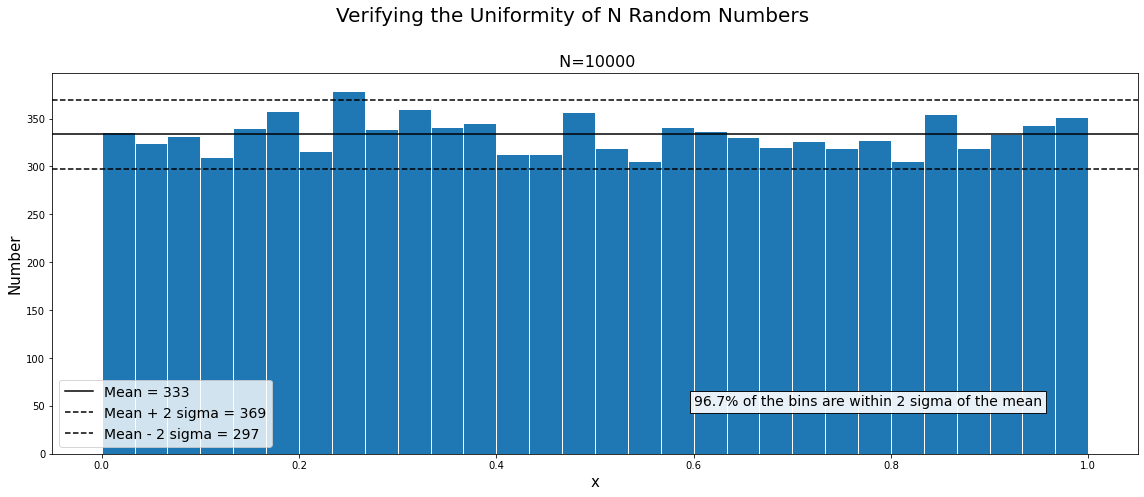

In [2]:
%matplotlib inline

N = 10000 #number of random numbers in the first histogram
M = 30 #number of bins per histogram

def uniform_random(low, high, n, m):
    """
    Returns an array of n-many uniformly distributed numbers between low and high. Also returns the mean and standard 
    deviation of a given bin (as discussed above) for the case of m-many bins.
    
    Arguments:
        low (float)
        high(float)
        n (int)
        m (int)
    Returns:
        array (np array of floats)
        mean (int)
        standard_deviation (float)
    """
    array = np.random.uniform(low, high, size=n)
    mean = n/m
    standard_deviation = np.sqrt(mean * (1 - (1 / m)))
    
    return array, mean, standard_deviation

def uniform_verification(random_array, m):
    """
    For a given array of random numbers, determines what percentage of the m-many bins in the associated histogram have a 
    height that is within 2 standard deviations of the mean height.
    
    Arguments:
        random_array (np array of floats)
        m (int)
    Returns:
        percentage (float)
    """
    #unpacking
    array = random_array[0]
    mean = random_array[1]
    standard_deviation = random_array[2]
    
    #finding the bin heights
    bin_heights = np.histogram(random_array[0], bins=m)[0]
    
    #counter is number of bins within 2 sigma of the mean
    counter = 0
    for index, height in enumerate(bin_heights):
        if height >= mean - 2 * standard_deviation and height <= mean + 2 * standard_deviation:
            counter = counter + 1
        else:
            None
    
    #calculating the percentage of bins
    percentage = 100* (counter / m)
    
    return percentage

#producing a random array and calculating the percentage of bins within two standard deviations:
uniform_random_array = uniform_random(0, 1, N, M)
two_sigma_percentage = uniform_verification(uniform_random_array, M)

#setting up figure:
plt.rcParams["figure.figsize"] = (16, 7)
figure = plt.figure()
figure.suptitle(r'Verifying the Uniformity of N Random Numbers', fontsize=20)

#setting up the N subplot:
uniform_random_plot = figure.add_subplot(111)
uniform_random_plot.set_title('\n N={}'.format(N), fontsize=16)
uniform_random_plot.set_xlabel(r'x', fontsize=15)
uniform_random_plot.set_ylabel(r'Number', fontsize=15)
uniform_random_histogram = uniform_random_plot.hist(uniform_random_array[0], bins=M, ec='w')

#plotting the mean +- sigma lines:
mean = float(uniform_random_array[1])
sigma = float(uniform_random_array[2])
upper = mean + 2 * sigma
lower = mean - 2 * sigma

mean_line = uniform_random_plot.axhline(mean, 0, 1, color='black', label='Mean = {:3.0f}'.format(mean))
upper_line = uniform_random_plot.axhline(upper, 0, 1, color='black', linestyle='--', 
                                         label='Mean + 2 sigma = {:3.0f}'.format(upper))
lower_line = uniform_random_plot.axhline(lower, 0, 1, color='black', linestyle='--', 
                                         label='Mean - 2 sigma = {:3.0f}'.format(lower))

#adding and editing text:
percentage_text = uniform_random_plot.text(0.6, 50, 
                                           '{:3.1f}% of the bins are within 2 sigma of the mean'.format(two_sigma_percentage),
                                           backgroundcolor='white', fontsize = 14)
percentage_text.set_bbox(dict(facecolor='w', alpha=0.9))

uniform_random_legend = uniform_random_plot.legend(loc='lower left', fontsize='14')
plt.tight_layout()

For this set of random numbers, approximately 95% of the numbers are within 2$\sigma$ of the mean, indicating that the random numbers are indeed uniformly distributed. However, to be more sure, we can run these calculations multiple times and find the averave percentage. This has been implemented below for the case of 5000 trials.

In [3]:
TRIALS = 5000

def average_uniform_verification(n, m, trials):
    """
    Runs the above procedure for 'trials'-many different runs and calculates the average percentage of bins with height 
    within 2 sigma of the mean.
    
    Arguments:
        n (int)
        m (int)
        trials (int)
    Returns:
        average_percentage (float)
    """
    counter = 0
    percentages = np.zeros(trials)
    
    while counter < trials:
        
        #producing array of random numbers
        random_array = uniform_random(0, 1, n, m)
        #calculating percentage of bins within 2 standard devitions
        temp = uniform_verification(random_array, m)
        #recording this value
        percentages[counter] = temp
        
        counter = counter + 1
    
    #calculating the mean value of the percentage of bins with two standard deviations
    average_percentage = np.mean(percentages)
    
    return average_percentage

print('The average percentage of bins within 2 sigma of the mean is {:3.1f}% for {:3.0f} trials'.format(average_uniform_verification(N, M, TRIALS), TRIALS))

The average percentage of bins within 2 sigma of the mean is 95.4% for 5000 trials


This value is very close to 95%, indicating extremely strongly that np.random.uniform() produces uniformly distributed random numbers.

### Uniformly Distributed Points in 3D

Now that we've verified that np.random.uniform() does in fact produce uniformly distributed random numbers, we can use it to generate random points in 3 dimensions. The resulting plots can then be investigated by eye to determine whether or not spectral issues are present. For comparison, an inferior method of generating random numbers is plotted in the same way. This method does suffer from spectral problems, as can be seen in the way that the points appear to align along regularly spaced planes.

<IPython.core.display.Javascript object>


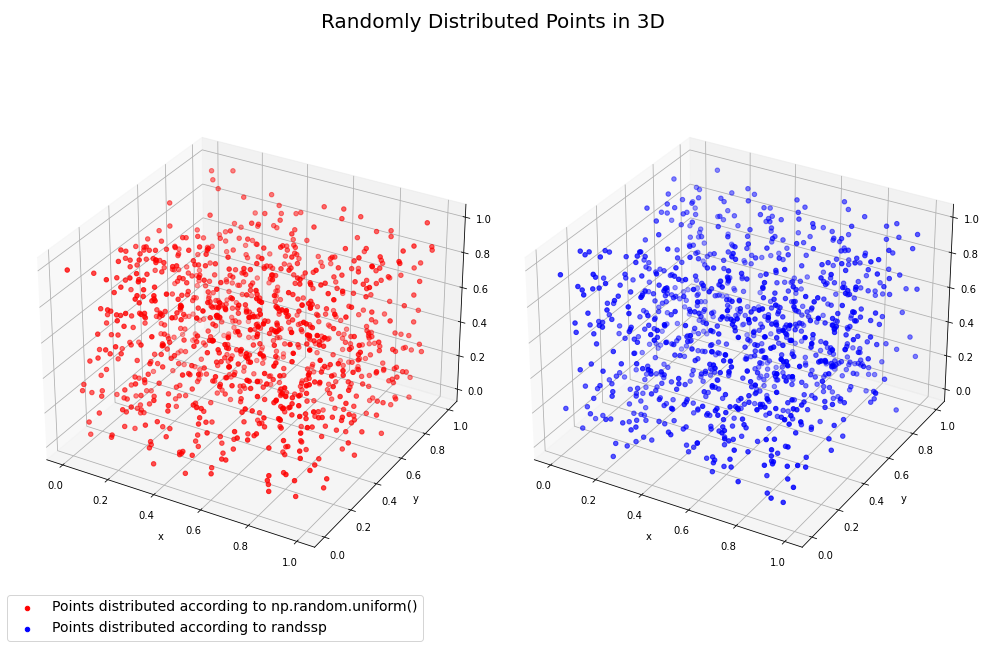

In [17]:
%matplotlib notebook

NUM_POINTS = 1000

def uniform_random_3D(low, high, num_points):
    """
    Produces an array of 'num_points'-many triplets of uniform random numbers. The coordinates of the i-th point are given by 
    uniform_random_3D[i, :]. The random numbers take values between 'low' and 'high'.
    
    Arguments:
        low (float)
        high (float)
        num_points (int)
    Returns
        r_array (np array of floats)
    """
    
    r_array = np.zeros([num_points, 3])
    
    for i in range(num_points):
        r_array[i] = np.random.uniform(low, high, size=3)
        
    return r_array

def randssp(p, q):
    """
    Produces an array of p-many sets of q-many random numbers. Note that these are not uniformly distributed.
    
    Arguments:
        p (float)
        q (float)
    Returns:
        r (array of floats)
    """
    
    global m, a, c, x
        
    try: x
    except NameError:
        m = pow(2, 31)
        a = pow(2, 16) + 3
        c = 0
        x = 123456789
    
    try: p
    except NameError:
        p = 1
    try: q
    except NameError:
        q = p
    
    r = np.zeros([p,q])

    for l in range (0, q):
        for k in range (0, p):
            x = np.mod(a * x + c, m)
            r[k, l] = x/m
            
    return r

#adjusting figure sizes
plt.rcParams["figure.figsize"] = (13.7, 9)
uniform_points_fig = plt.figure('Randomly Distributed Points in 3D Figure')
uniform_points_fig.suptitle('Randomly Distributed Points in 3D', fontsize=20)

#setting up np.random.uniform() points subplot
random_uniform_points = uniform_points_fig.add_subplot(121, projection='3d')
random_uniform_points.set_xlabel('x')
random_uniform_points.set_ylabel('y')
random_uniform_points.set_zlabel('z')

#Plotting the np.random.uniform() 3D points:
coordinates = uniform_random_3D(0, 1, NUM_POINTS)
random_uniform_scatter = random_uniform_points.scatter(coordinates[:, 0], coordinates[:, 1], coordinates[:, 2], color='r', 
                                                       label = 'Points distributed according to np.random.uniform()')

#setting up randssp points subplot
randssp_points = uniform_points_fig.add_subplot(122, projection='3d')
randssp_points.set_xlabel('x')
randssp_points.set_ylabel('y')
randssp_points.set_zlabel('z')

#Plotting the randssp 3D points:
randssp_coordinates = randssp(3, NUM_POINTS)

randssp_scatter = randssp_points.scatter(randssp_coordinates[0, :], randssp_coordinates[1, :], randssp_coordinates[2, :], 
                                          color='b', label = 'Points distributed according to randssp')

uniform_points_figure = uniform_points_fig.legend(fontsize=14, loc='lower left')

plt.tight_layout()
plt.show()

Rotating the plots, we can see that the np.random.uniform() method has no spectral issues. This is as we would expect given our determination of np.random.uniform() as giving uniformly distributed random numbers.

### Random Numbers Distributed According to an Exponential Distribution.

Now that we've demonstrated our ability to generate uniformly distributed numbers, we can use these uniformly distributed numbers to produce numbers distributed according to some exponential distribution, namely 

$$ P(x) = exp\left(\frac{-x}{\lambda}\right) $$

This can be accomplished with the "Inverse CDF Method". This involves calculating the cumulative distribution function (CDF) associated with some probability density function (PDF) and then finding its inverse. If a uniformly distributed random number is used as the input for this inverse CDF, the result is a collection of random numbers distributed according to the original PDF. In our case, the PDF under consideration is the exponential distribution above. The associated inverse CDF is given by

$$ x=cdf^{-1}(y) = -\lambda\ln(1-y) = -\lambda\ln(y)$$

where x and y are the coordinates of the points, and y is a uniformly distributed random number between 0 and 1. Let's plot 10,000 random numbers distributed according to the exponential distribution to verify the quality of the generated points. We'll do this in the form of a histogram with 50 bins and with a $\lambda$ value of 12.

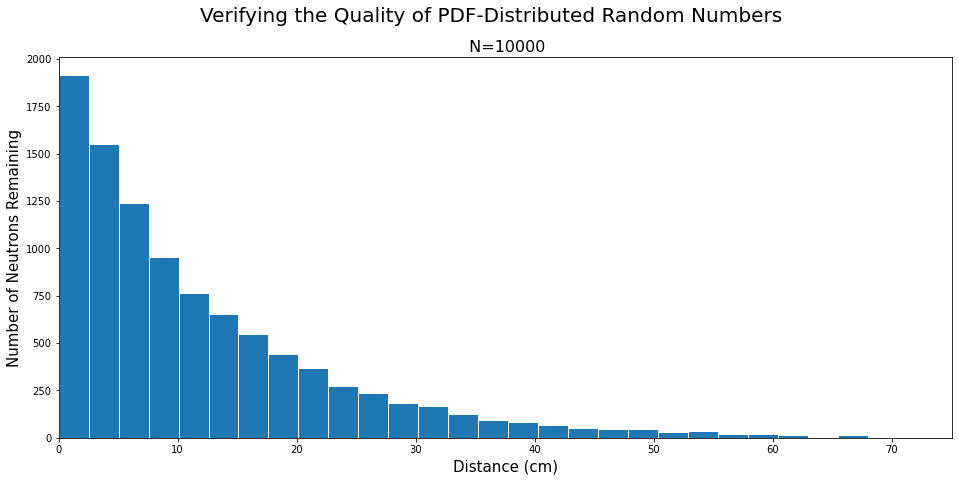

In [5]:
%matplotlib inline

LAMBDA = 12
NUM_POINTS = 10000
M=50

def exponential_inv_cdf(lambda_value, num_points):
    """
    Produces a set of 'num_points'-many random numbers distributed according to a exponential distribution as given above with
    lambda = 'lambda_value'. 
    
    Arguments:
        lambda_value (float)
        num_points (int)
    Returns:
        x (np array of floats)
    """
    
    y = np.random.uniform(0, size=num_points)
    x = -1 * lambda_value * np.log(y)
    
    return x

#generating the random numbers according to the exponential distribution
generated_values = exponential_inv_cdf(LAMBDA, NUM_POINTS)

#Setting up the figure
plt.rcParams["figure.figsize"] = (16, 7)
figure = plt.figure()
figure.suptitle(r'Verifying the Quality of PDF-Distributed Random Numbers', fontsize=20)

#setting up the N subplot
exponential_generation_plot = figure.add_subplot(111)
exponential_generation_plot.set_title('\n N={}'.format(NUM_POINTS), fontsize=16)
exponential_generation_plot.set_xlabel('Distance (cm)', fontsize=15)
exponential_generation_plot.set_ylabel(r'Number of Neutrons Remaining', fontsize=15)
exponential_generation_plot.set_xlim(right=75)

#plotting the random numbers
exponential_plot = exponential_generation_plot.hist(generated_values, bins=M, ec='w')

### Exponential PDF Generator Applied to a Simplified Case:

Now let's apply this random exponential PDF generator to water, ignoring scattering, to find water's characteristic attenuation length $\lambda$. From theory, we know that the exponential PDF is given by 

$$P(x)=exp\left(\frac{-x}{\lambda_F}\right), \:\: \lambda_F = \frac{1}{n\sigma}$$

Where $n$ is the number density of molecules, $\lambda_F$ is the mean free path and $\sigma$ is the microscopic cross-section for absorption. Thus, $n$ is given by

$$ n = \frac{\rho N_A}{M_{molar}} $$

where $\rho$, $N_A$, and $M_{molar}$ are the density, avagadro's number, and the molar mass respectively. Avagadro's number is of course given by $ N_A = 6.022 × 10^{23} mol^{-1} $. For water, the other quanitites take the following values: 

$$\rho = 1 \, gcm^{-3}, \: M_{molar} = 18.01528 \, gmol^{-1}, \: \sigma=0.6652 \, barn $$

Note that one barn is equivilent to $10^{-24} \, cm^2$. With these quantities, we can simulate neutron penetration through water (considering only absorption) and calculate a value for $\lambda$. To do this, we run the PDF generator using our  value for $\lambda_F$ as given above, and then take the logarithm of the plot to get the linear relationship 

$$\ln(N) = \frac{-x}{\lambda} $$

where $N$ is the number of neutrons. This means that $\lambda$ can be found from a linear fit to this curve since the gradient of such a fit will be given by $-\lambda^{-1}$. The error on $\lambda$, $\sigma_{\lambda}$ can therefore be found as 

$$\sigma_{\lambda} = \frac{\sigma_m}{m^2} $$

where $m$ is the gradient and $\sigma_m$ is the error on the gradient. Note, that this means that we will have to remove any points with $N=0$ since these will cause the logarithm to diverge. This procedure is carried out below for the case of a single trial with 1,000,000 neutrons and $M=100$ bins. 

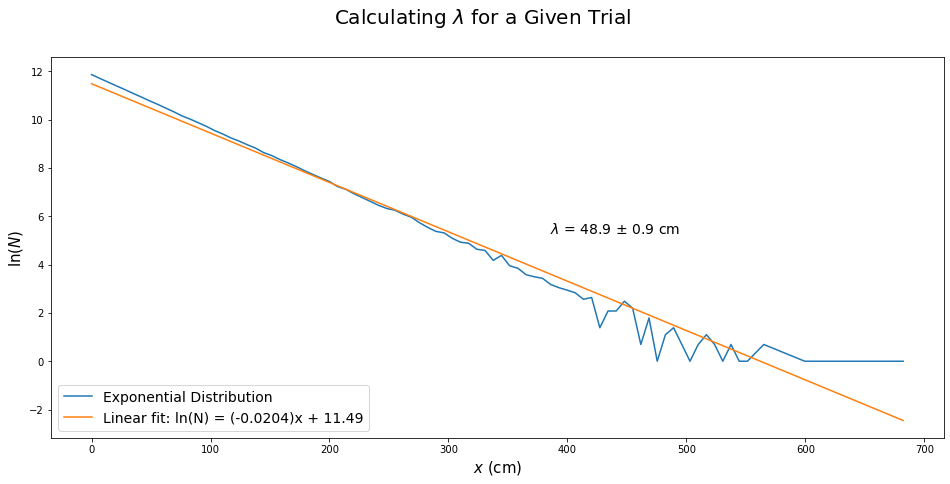

In [6]:
%matplotlib inline

#relevant physical paramaters:
DENSITY = 1 #gcm^-3
MOLAR_MASS = 18.01528 #gmol^-1
AVAGADRO = 6.022 * 10 ** 23 #mol^-1
ABS_CROSS_SECTION = 0.6652 * 10 ** (-24) #cm^2

#mean free path value in cm^-1 (ignoring scattering):
lambda_water_abs = MOLAR_MASS / (ABS_CROSS_SECTION * DENSITY * AVAGADRO)

#parameters for the plots:
NUM_NEUTRONS = 1000000
M=100

def logarithm_plotter(lambda_value, num_neutrons, num_bins):
    """
    Calculates ln(N) and x for an exponentional distribution with lambda = 'lambda_value'. N and x are, respectively, the
    bin heights and (left-side) bin edges of the histogram associated with the distribution,  with 'num_bins'-many bins. Also 
    removes data points with N=0 to avoid ln(N) blowing up to minus infinity.
    
    Arguments:
        lambda_value (float)
        num_neutrons (int)
        num_bins (int)
    Returns:
        x_values_nonzero (np array of floats)
        ln_N_values (np array of floats)
    """
    #generating random numbers distributed according the exponential distribution above
    generated_values = exponential_inv_cdf(lambda_value, num_neutrons)
    
    #determining the heights and edges of these histograms 
    N_values = np.histogram(generated_values, bins=num_bins)[0]
    x_values = np.histogram(generated_values, bins=num_bins)[1][:-1]
    
    #removing any datapoints for which N=0 to avoid an error with the logarithm:
    x_values_nonzero = np.empty(0)
    N_values_nonzero = np.empty(0)
    
    for i in range(len(N_values)):
        if N_values[i] == 0:    
            None
            
        else:
            x_values_nonzero = np.append(x_values_nonzero, x_values[i])
            N_values_nonzero = np.append(N_values_nonzero, N_values[i])
    
    #taking the natural log the N values
    ln_N_values = np.log(N_values_nonzero)
    
    return x_values_nonzero, ln_N_values

def linear_fit_params(x, ln_N):
    """
    Computes a linear fit to the data 'x' and 'ln_N', calculating the gradient, the intercept, and the error on the gradient.
    With these values, calculates lambda and the error on lambda as described above. 
    
    Arguments:
        x (np array of floats)
        ln_N (np array of floats)
    Returns:
        gradient (float)
        intercept (float)
        lambda_value (float)
        lambda_error (float)
    """
    #making a linear fit to the data
    results = np.polyfit(x, ln_N, deg=1, cov=True)

    #unpacking the relevant paramaters and thier errors
    params = results[0]
    gradient = params[0]
    intercept = params[1]
    param_errors = results[1]
    #errors from the covariance matrix
    gradient_error = np.power(param_errors[0, 0], 0.5)
    
    #calculating lambda and its error as described above
    lambda_value = -1 / (gradient)
    lambda_error = gradient_error / (gradient ** 2)
    
    return gradient, intercept, lambda_value, lambda_error

def linear_fit_plotter(x, m, c):
    """
    Given x coordinates, computes y coordinates according to the linear relationship y = mx + c. The x coordinates are 
    calculated as regularly spaced values between zero and the maximum value of x in the data. Returns the x and y coordinates
    
    Arguments:
        x (np array of floats)
        m (float)
        c (float)
    Returns:
        x_coordinates (np array of floats)
        y_coordinates (np array of floats)
    
    """
    x_coordinates = np.linspace(np.min(x), np.max(x), num=1000)
    y_coordinates = m * x_coordinates + c
    
    return x_coordinates, y_coordinates
    
#Setting up the figure:
plt.rcParams["figure.figsize"] = (16, 7)
figure = plt.figure()
figure.suptitle(r'Calculating $\lambda$ for a Given Trial', fontsize=20)

#setting up the subplot:
lambda_log_plot = figure.add_subplot(111)
lambda_log_plot.set_xlabel('$x$ (cm)', fontsize=15)
lambda_log_plot.set_ylabel(r'$\ln(N)$', fontsize=15)

#plotting the x vs ln(N) graph:
plot_values = logarithm_plotter(lambda_water_abs, NUM_NEUTRONS, M)
x_values = plot_values[0]
ln_N_values = plot_values[1]
lambda_log_graph = lambda_log_plot.plot(x_values, ln_N_values, label='Exponential Distribution')

#making a linear fit to the data and calculating lambda:
fit_parameters = linear_fit_params(x_values, ln_N_values)
gradient = fit_parameters[0]
intercept = fit_parameters[1]
lambda_value = fit_parameters[2]
lambda_error = fit_parameters[3]

#plotting the linear fit:
linear_fit_values = linear_fit_plotter(x_values, gradient, intercept)
linear_fit_graph = lambda_log_plot.plot(linear_fit_values[0], linear_fit_values[1], 
                                        label='Linear fit: ln(N) = ({:3.4f})x + {:3.2f}'.format(gradient, intercept))
#text containing the value of lambda
lambda_value_text = lambda_log_plot.text(385, 5.3, '$\lambda$ = {:3.1f} $\pm$ {:2.1f} cm'.format(lambda_value, lambda_error),
                                         fontsize='14')

log_plot_legend = lambda_log_plot.legend(loc='lower left', fontsize='14')

One point to note regarding the fit is that it becomes much worse as $x$ increases past ~350 cm. This is because $N$ can only take integer values, meaning $\ln(N)$ can't ever fall below 0. The linear fit however, isn't restricted to integer values in the same way. This causes the calculated $\lambda$ value to be larger than expected. This effect can be minimized by increasing the number of neutrons used, causing larger $x$ values to be weighted less heavily in the linear fit. 

Given that this is a statistical process, we need to perform this analysis a large number of times and average over all the runs to find a more accurate value of $\lambda$. The weighted mean of $n$  values of $\lambda$ will be calculated as

$$\lambda_{m} = \frac{\sum_{i=1}^{i=n}\omega_i \lambda_i}
                        {\sum_{i=1}^{i=n}\omega_i}, \:\: \omega_i = \frac{1}{\sigma_{\lambda\,(i)}^2} $$

where the weights $\omega_i$ are written in terms of the errors associated with the $i$-th $\lambda$ value, $\sigma_{\lambda\,(i)}$. The standard deviation on this weighted mean is given by

$$\sigma_{\lambda\,(m)} = \frac{1}{\sqrt{\sum_{i=1}^{i=n}\omega_i}} $$

Let's run the above procedure for 200 trials of 1,000,000 neutrons each.

In [7]:
NUM_TRIALS = 200
NUM_NEUTRONS = 1000000 

def mean_lambda_value(lambda_theory, num_neutrons, num_trials, num_bins):
    """
    """
    counter = 0
    lambda_calculated_array = np.empty(0)
    lambda_error_array = np.empty(0)
    
    while counter < num_trials:
        
        values = logarithm_plotter(lambda_theory, num_neutrons, num_bins)
        x = values[0]
        ln_N = values[1]
        fit_params = linear_fit_params(x, ln_N)
        
        lambda_calculated = fit_params[2]
        lambda_error = fit_params[3]
        
        lambda_calculated_array = np.append(lambda_calculated_array, lambda_calculated)
        lambda_error_array = np.append(lambda_error_array, lambda_error)
        
        counter = counter + 1
    
    weight = np.power(lambda_error_array, -2)
    weighted_mean = np.average(lambda_calculated_array, weights=weight)
    weighted_mean_error = np.power(np.sum(weight), -0.5)
    
    return weighted_mean, weighted_mean_error

mean_values = mean_lambda_value(lambda_water_abs, NUM_NEUTRONS, NUM_TRIALS, M)

print('The weighted mean was found to be: ({:4.2f} ± {:3.2f}) cm'.format(mean_values[0], mean_values[1]))

The weighted mean was found to be: (46.48 ± 0.04) cm


We can therefore conclude that the characteristic attenuation length of water in the absence of scattering is in fact approximately 45 cm. 

### Random Generation of Isotropic Unit Vectors:

Now, leaving the exponential distribution for a moment, let's implement a function that allows us to generate isotropic unit vectors. This entails generation of points that are uniformly and randomly distributed over the surface of the unit sphere. Let's switch to polar coordinates (with $r=1$):

$$x_i = \sin{\theta_i}\cos{\phi_i}$$
$$y_i = \sin{\theta_i}\sin{\phi_i} $$
$$z_i = \cos{\theta_i} $$

where 

$$\:\: 0<\theta_i<\pi \:\: and \:\: 0<\phi_i<2\pi $$

First, let's naively use np.uniform.random() to generate values for $\phi_i$ and $\theta_i$ uniformly over thier respective domains. The points corresponding to the tips of the resulting unit vectors are plotted below.

<IPython.core.display.Javascript object>


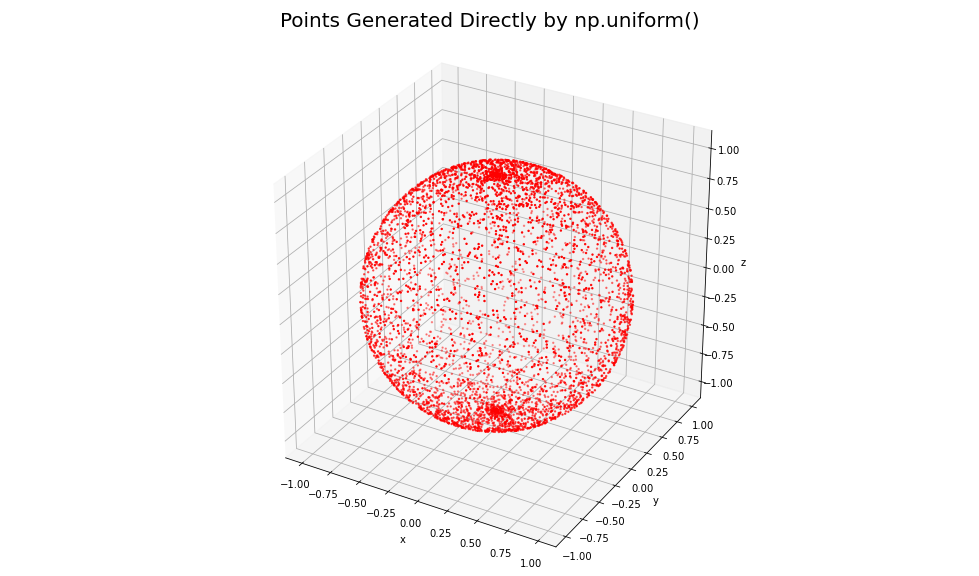

In [18]:
%matplotlib notebook

NUM_VECTORS = 5000

def isotropic_vectors_naive(num_points):
    """
    Produces 'num_points'-many "isotropic" unit vectors according to the procedure above. The coordinates of the ith vector are
    given by (r_values[0, i], r_values[1, i], r_values[2, i])
    
    Arguments:
        num_points (int)
    Returns:
        r_values (np array of floats)
    """
    #randomly generating theta and phi values as described:
    theta_values = np.random.uniform(0, np.pi, size=num_points)
    phi_values = np.random.uniform(0, 2*np.pi, size=num_points)
    
    #calculating x, y, and z according to the formulae above
    x = np.sin(theta_values) * np.cos(phi_values)
    y = np.sin(theta_values) * np.sin(phi_values)
    z = np.cos(theta_values)
    
    #combining all the coordinates to make one list of 3D vectors
    r_values = np.array([x, y, z])
    #normalizing the vectors
    length = x ** 2 + y ** 2 + z ** 2
    r_values = r_values / length
    
    return r_values
    
#Setting up Figure
plt.rcParams["figure.figsize"] = (13.6, 8)
isotropic_naive_fig = plt.figure('Points Generated by np.uniform() Figure')
isotropic_naive_fig.suptitle('Points Generated Directly by np.uniform()', fontsize=20)

#Setting up the subplot for the isotropic unit vectors produced by np.random.uniform():
isotropic_naive_points = isotropic_naive_fig.add_subplot(111, projection='3d')
isotropic_naive_points.set_xlabel('x')
isotropic_naive_points.set_ylabel('y')
isotropic_naive_points.set_zlabel('z')

#adjusting the axes so that the sphere appears spherical:
world_limits = isotropic_naive_points.get_w_lims()
isotropic_naive_points.set_box_aspect((world_limits[1] - world_limits[0],
                                   world_limits[3] - world_limits[2], world_limits[5] - world_limits[4]))

#plotting the unit vectors
coordinates = isotropic_vectors_naive(NUM_VECTORS)
isotropic_naive_points.scatter(coordinates[0, :], coordinates[1, :], coordinates[2, :], color='r', s=2)

plt.tight_layout()
plt.show()

As can be seen from the much higher density of points at the poles ($\theta = 0$ and $\theta = {\pi}$), this method failed to produce truly isotropic unit vectors. This is because although we successfully generated numbers uniformly at a given value of $\theta$ (i.e. over a given ring in the xy-plane), the radius of the sphere decreases as we approach the poles. Approaching the poles, the points are spread over rings of smaller and smaller radius, and so the number of points per unit area increases. 

To combat this, we can use the inverse cdf method to generate random values of $\theta$ in such a way as to exactly counteract the increasing density near the poles. We can do this by inverting the equation for $z$ given above to obtain the following distribution:

$$ \theta_i = Arccos(1 - 2 u_i) $$

where $u_i$ is a random variable distributed uniformly between 0 and 1. The points corresponding to unit vectors generated via this method are plotted below.

<IPython.core.display.Javascript object>


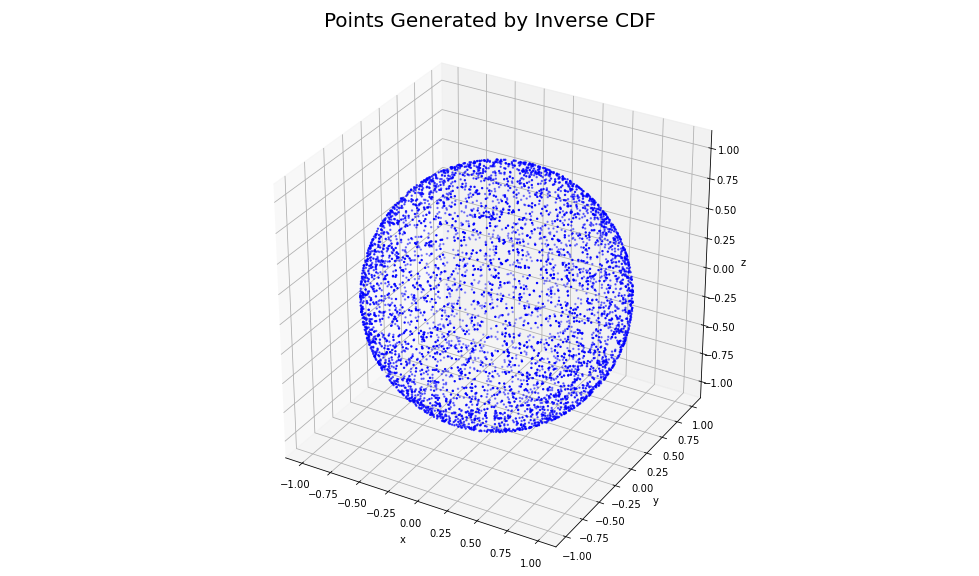

In [19]:
%matplotlib notebook

NUM_POINTS = 5000

def isotropic_vectors_cdf(num_points):
    """
    Generates the coordinates of 'num_points'-many isotropic unit vectors according to the procedure above. The coordinates
    of the ith vector are given by (r_values[0, i], r_values[1, i], r_values[2, i])
    """
    #generating theta values with inverse cdf methods
    u_values = np.random.uniform(0, 1, size=num_points)
    theta_values = np.arccos(1 - 2 * u_values)
    
    #generating phi values as before
    phi_values = np.random.uniform(0, 2*np.pi, size=num_points)
    
    #calculating x, y, and z according to the formulae above
    x = np.sin(theta_values) * np.cos(phi_values)
    y = np.sin(theta_values) * np.sin(phi_values)
    z = np.cos(theta_values)
    
    #combining all the coordinates to make one list of 3D vectors
    r_values = np.array([x, y, z])
    
    #normalizing the vectors
    length = x ** 2 + y ** 2 + z ** 2
    r_values = r_values / length
    
    return r_values


#Setting up Figure
plt.rcParams["figure.figsize"] = (13.6, 8)
isotropic_cdf_fig = plt.figure('Points Generated by Inverse CDF Figure')
isotropic_cdf_fig.suptitle('Points Generated by Inverse CDF', fontsize=20)

#Setting up the subplot for the isotropic unit vectors produced by np.random.uniform():
isotropic_cdf_points = isotropic_cdf_fig.add_subplot(111, projection='3d')
isotropic_cdf_points.set_xlabel('x')
isotropic_cdf_points.set_ylabel('y')
isotropic_cdf_points.set_zlabel('z')

#adjusting the axes so that the sphere appears spherical:
world_limits = isotropic_cdf_points.get_w_lims()
isotropic_cdf_points.set_box_aspect((world_limits[1] - world_limits[0],
                                   world_limits[3] - world_limits[2], world_limits[5] - world_limits[4]))

#plotting the unit vectors
coordinates = isotropic_vectors_cdf(NUM_VECTORS)
isotropic_cdf_points.scatter(coordinates[0, :], coordinates[1, :], coordinates[2, :], color='b', s=2)

plt.tight_layout()
plt.show()

Looking at the plot above, we can see that the unit vectors generated by this method appear free of spectral issues. 

## 2. Monte Carlo Simulation of Neutron Penetration:

With all the necessary machinery now in place, we can begin applying the functions implemented in section 1 to simulate the penetration of thermal neutrons through shielding. We will be investigating three materials: water, graphite, and lead.

### Exponentially-Distributed Isotropic Steps :

First, we need a way to generate the random steps taken by a neutron ricocheting through a material. We are assuming that the direction in which the neutron ricochets is completely random and that the distance that the neutron travels between collisions is determined by the exponential distribution, 

$$ P(x) = exp\left(\frac{-x}{\lambda}\right) $$

Therefore, we can use our exponentially-distributed random number generator to determine the length of these steps, and our isotropic unit vector generator to determine thier direction. We are now capable of simulating random walks of particles governed by a mean free path $\lambda$. Below, the first six steps of the random walks of three particles are calculated. For the sake of demonstration, all particles start at (0, 0, 0) and are subject to $\lambda=1.3$ cm.

In [25]:
%matplotlib notebook

NUM_STEPS = 6
NUM_NEUTRONS = 3
LAMBDA_TEST = 1.3 #cm

def step_generator(lambda_value, num_steps):
    """
    Generates 'num_steps'-many random steps with length determined by the inverse cdf exponential random number generator and 
    direction determined by the isotropic unit vector generator. The coordinates of the ith vector are given by 
    (r[0, i], r[1, i], r[2, i])
    
    Arguments:
        num_steps (int)
        lambda_value (float)
    Returns:
        steps(np array of floats) 
    """
    
    steps = exponential_inv_cdf(lambda_value, num_steps) * isotropic_vectors_cdf(num_steps)
    
    return steps

def random_walk_plots(axes, lambda_value, num_steps, num_neutrons):
    """
    Calculates random walks of 'num_steps'-many steps for 'num_neutrons'-many neutrons using the the step generator function 
    with 'lambda_value' as the mean free path (all walks start from (0, 0, 0)). Then, plots all of these paths and denotes the 
    start and end points of each with markers. 
    
    Arguments:
        axes (plt axes)
        lambda_value (float)
        num_steps (int)
        num_neutrons (int)
    Returns:
        None
    """
    #plotting (0, 0, 0), the starting point for all of the neutrons
    middle = axes.scatter(0, 0, 0, marker='x', color='black', s=50, label='Initial Position: (0, 0, 0) cm')
    legend = axes.legend(loc='lower left', fontsize=14)
    
    #for each of the "neutrons":
    counter = 0
    while counter<num_neutrons:
        
        #generating the steps used
        steps = step_generator(lambda_value, num_steps)
        #creating an array of position values
        positions = np.zeros([3, num_steps + 1])
        
        #for each step, adding a step to the current position and recording these new coordinates as the next position value
        for i in range(num_steps):
            positions[:, i+1] = positions[:, i] + steps[:, i]
        
        #plotting the random walks as well as thier end points
        axes.plot(positions[0, :], positions[1, :], positions[2, :])
        ends = axes.scatter(positions[0, -1], positions[1, -1], positions[2, -1], marker='o', color='black', s=10)
        
        counter = counter + 1
    
    return()

#adjusting figure size
plt.rcParams["figure.figsize"] = (13.6, 8)

#Setting up the plot for the random walk plots:
random_walk_fig = plt.figure('Random Walk Figure')
random_walks = random_walk_fig.add_subplot(111, projection='3d')
random_walk_fig = plt.suptitle('Collection of Random Walks', fontsize=20)

#setting axis labels
random_walks.set_xlabel('x (cm)')
random_walks.set_ylabel('y (cm)')
random_walks.set_zlabel('z (cm)')
    
random_walk_plots(random_walks, LAMBDA_TEST, NUM_STEPS, NUM_NEUTRONS)

plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>

### Calculation of Macroscopic Cross Sections and Total Mean Free Path:

In order to calculate the total mean free paths of the materials considered in this simulation, (i.e., taking both absorption and scattering into account), we need to first calculate the total macroscopic cross section, $\Sigma_T$.

$$\Sigma_T = \Sigma_A + \Sigma_S = n\sigma_A + n\sigma_S$$

where $n$ is the number density of atoms in the shielding material, $\Sigma_A$ and $\Sigma_S$ are the macroscopic absorption and scattering cross sections and $\sigma_A$ and $\sigma_S$ are the corresponding microscopic cross sections. As stated earlier, we can find $n$ as

$$ n = \frac{\rho N_A}{M_{molar}} $$

where the relevant physical parameters can be found below. The total mean free path can be found from $\Sigma_T$ as

$$\lambda_T = \frac{1}{\Sigma_T} $$

The macroscopic cross sections are also used to calculate the probability of absorption $(P_A)$ and scattering $(P_S)$ as 

$$ P_A = \frac{\Sigma_A}{\Sigma_A+\Sigma_S}=\frac{\sigma_A}{\sigma_A + \sigma_S} $$
$$ P_S = \frac{\Sigma_S}{\Sigma_A+\Sigma_S}=\frac{\sigma_S}{\sigma_A + \sigma_S} $$

Note that $P_A = 1- P_S$, given that these are the only two possible processes upon collision. 

In [11]:
#general physical parameter (Avagadro's number)
AVAGADRO = 6.022 * 10 ** 23 #mol^-1

#physical paramaters for water:
DENSITY_WATER = 1 #gcm^-3
MOLAR_MASS_WATER = 18.01528 #gmol^-1
MICRO_ABS_CROSS_SECTION_WATER = 0.6652 * 10 ** (-24) #cm^2
MICRO_SCATTER_CROSS_SECTION_WATER = 103.0 * 10 ** (-24) #cm^2

#physical paramaters for lead:
DENSITY_LEAD = 11.35 #gcm^-3
MOLAR_MASS_LEAD = 207.2 #gmol^-1
MICRO_ABS_CROSS_SECTION_LEAD = 0.158 * 10 ** (-24) #cm^2
MICRO_SCATTER_CROSS_SECTION_LEAD = 11.221 * 10 ** (-24) #cm^2

#physical paramaters for graphite:
DENSITY_GRAPHITE = 1.67 #gcm^-3
MOLAR_MASS_GRAPHITE = 12.011 #gmol^-1
MICRO_ABS_CROSS_SECTION_GRAPHITE = 0.0045 * 10 ** (-24) #cm^2
MICRO_SCATTER_CROSS_SECTION_GRAPHITE = 4.74 * 10 ** (-24) #cm^2

def collision_parameters(avagadro, density, molar_mass, micro_abs_cross_section, micro_scatter_cross_section):
    """
    Uses the density, molar mass, and microscopic absorption and scattering cross sections of a given material, as well as
    Avagadro's number, to calculate the probability of absorption and total mean free path (cm) as laid out above. 
    
    Arguments:
        avagadro (float)
        density (float)
        molar_mass (float)
        micro_abs_cross_section (float)
        micro_scatter_cross_section (float)
    Returns:
        mean_free_path (float)
        probability_abs (float)
    """
    
    n = density * avagadro / molar_mass
    total_macro_cross_section = n * (micro_abs_cross_section + micro_scatter_cross_section)
    
    #calculating total mean free path
    mean_free_path = np.power(total_macro_cross_section, -1)
    #calculating the probability of absorption
    probability_abs = micro_abs_cross_section / (micro_abs_cross_section + micro_scatter_cross_section)
    
    return mean_free_path, probability_abs

water_parameters = collision_parameters(AVAGADRO, DENSITY_WATER, MOLAR_MASS_WATER, MICRO_ABS_CROSS_SECTION_WATER, 
                                        MICRO_SCATTER_CROSS_SECTION_WATER)

lead_parameters = collision_parameters(AVAGADRO, DENSITY_LEAD, MOLAR_MASS_LEAD, MICRO_ABS_CROSS_SECTION_LEAD, 
                                        MICRO_SCATTER_CROSS_SECTION_LEAD)

graphite_parameters = collision_parameters(AVAGADRO, DENSITY_GRAPHITE, MOLAR_MASS_GRAPHITE, 
                                           MICRO_ABS_CROSS_SECTION_GRAPHITE, MICRO_SCATTER_CROSS_SECTION_GRAPHITE)

print('Total Mean Free Paths: \n  Water: {:3.3f} cm \n  Lead: {:3.3f} cm \n  Graphite: {:3.3f} cm'.format(water_parameters[0], 
                                                                                                          lead_parameters[0],
                                                                                                          graphite_parameters[0]))

Total Mean Free Paths: 
  Water: 0.289 cm 
  Lead: 2.664 cm 
  Graphite: 2.517 cm


### Simulation of Neutron Penetration Through Water of "Thickness" T

Now, we can finally simulate the penetration of neutrons through shielding of thickness $T$ (with width and height considered to be infinite). For each neutron we undertake the following looping procedure for each step: 

First, we randomly choose a step size and direction using our random step generator function with $\lambda = \lambda_T$ (except for the first step for which we limit the direction to the x-direction). Then, after moving the neutron according to this step, we check if it's still within the material (i.e. $0<x<L$) and if not, mark it as either having been reflected ($x<0$) or transmitted ($x>L$) and terminate the loop. If the neutron is still within the material, we then determine whether the collision at the end of this step causes the neutron to be scattered or absorbed. Because absorption and scattering are the only processes considered, the outcome can be determined by generating a random number between 0 and 1. If this number is below $P_A$, the neutron is considered to have been absorbed; else the neutron is considered to have been scattered. If the neutron is absorbed, it is marked as such and the loop terminates. If it's scattered, this procedure repeats. 

This procedure is carried out below for the case of 600 neutrons normally incident on water of thickness $T=10$ cm. The fraction of neutrons transmitted $(n_T)$, reflected $(n_R)$, and absorbed $(n_A)$ are calculated.

<IPython.core.display.Javascript object>


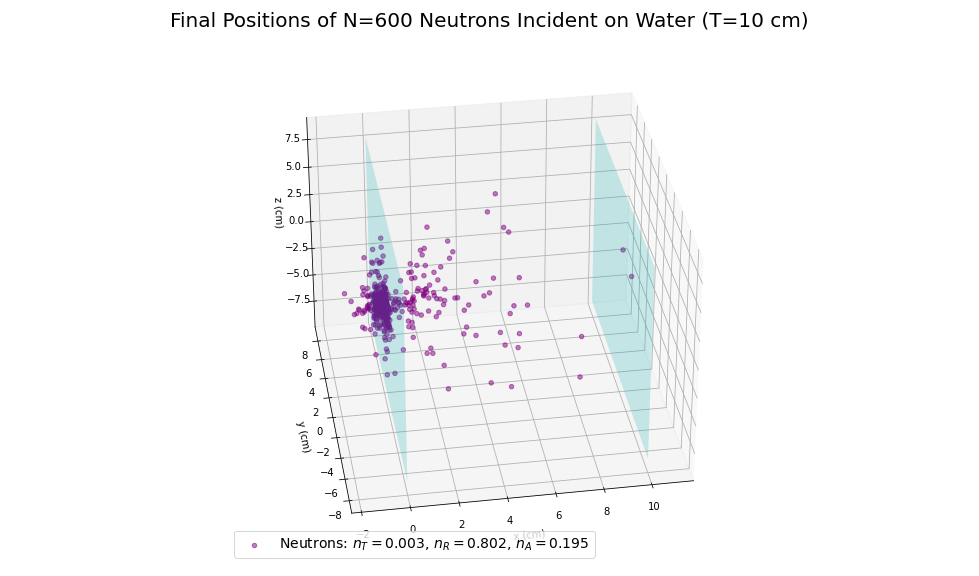

In [26]:
%matplotlib notebook

THICKNESS = 10 #cm
NUM_NEUTRONS = 600

def first_step_generator(lambda_value):
    """
    Calculates the first step of neutrons normally incident on a slab of material at (0, 0, 0). Hence, scales a unit vector
    in the x-direction by the random variable distributed according to the exponential distribution with parameter
    'lambda_value'.
    
    Arguments:
        lambda_value (float)
    Return:
        first_step (np array of floats)
    """
    
    first_step = exponential_inv_cdf(lambda_value, 1) * np.array([[1], [0], [0]])
        
    return first_step

def neutron_position_check(position, thickness):
    """
    Checks if a neutron at 'position' is still within the slab of thickness 'thickness'. If the neutron passed through the
    slab (i.e. x>'thickness'), returns 2. If the neutron was reflected (i.e. x<0), 1 is returned. Else, if the neutron is
    inside the slab, returns 0.
    
    Arguments:
        position (np array of floats)
        thickness (float)
    Returns:
        output (int)
    """
    
    #setting to neither reflected nor transmitted as default
    output = 0 
    x_coordinate = position[0]
    
    #checking for reflection
    if x_coordinate < 0:
        output = 1
        return output
    
    #checking for transmission
    elif x_coordinate > thickness:
        output = 2
        return output
    
    else:
        return output
    
def neutron_absorbed(probability_abs):
    """
    Determines whether a neutron was absorbed by calculating a random number between 0 and 1 and comparing it to P_A as 
    described above. Returns True if the neutrons is absorbed and False otherwise.
    
    Arguments:
        probability_abs (float)
    Returns:
        boolean (boolean)
    """
    
    #generating random number
    u = np.random.uniform(0, 1)
    
    #comparison of random number with probability of absorption
    if u < probability_abs:
        return True
    
    else:
        return False
        
def neutron_loop(material_parameters, thickness, num_neutrons):
    """
    Carries out the neutron loop described above for 'num_neutrons'-many neutrons. 'material_parameters' determines the 
    material of the slab and 'thickness' determines its thickness. Calculates and returns n_T, n_R, n_A. Also returns
    the final positions of all neutrons.
    
    Arguments:
        material_parameters (np array of floats)
        thickness (float)
        num_neutrons (int)
    Returns:
        fraction_transmitted (float)
        fraction_reflected (float)
        fraction_absorbed (float)
        final_positions (np array of floats)
    """
    
    #unpacking material's physical parameters
    mean_free_path = material_parameters[0]
    probability_abs = material_parameters[1]
    
    #setting up way to count the number of reflections, transmissions, absorptions
    num_reflected = 0
    num_transmitted = 0 
    num_absorbed = 0
    
    #setting up way to record the final positions of each neutron
    final_positions = np.zeros([num_neutrons, 3])
    
    #for each neutron:
    for i in range(num_neutrons):
        
        #calculate the first step using the first step generator s.t. x > 0
        position = first_step_generator(mean_free_path)
        
        #determine whether the neutron is still within the box after its first step
        neutron_position_status = neutron_position_check(position, thickness)
        
        #if it is, check if it's been absorbed
        if neutron_position_status == 0:
            absorbed = neutron_absorbed(probability_abs)  
        #if not, don't check for absorption
        else:
            None
        
        #if the neutron is still within the slab and hasn't been absorbed after the first step:
        
        while neutron_position_status == 0 and absorbed == False:
            
            #take a random step
            step = step_generator(mean_free_path, 1)
            position = position + step
            
            #check if the neutron is still inside the slab
            neutron_position_status = neutron_position_check(position, thickness)
            
            #only check for absorption if the neutron is still inside the slab to avoid double counting
            if neutron_position_status == 0:
                absorbed = neutron_absorbed(probability_abs) 
                    
            else:
                None
        
        #if the neutron was transmitted, add it to the transmitted tally
        if neutron_position_status == 2:
            num_transmitted = num_transmitted + 1
            
        #if the neutron was reflected, add it to the reflected tally
        elif neutron_position_status == 1:
            num_reflected = num_reflected + 1
        
        #if the neutron was absorbed, add it to the absorbed tally
        elif absorbed == True:
            num_absorbed = num_absorbed + 1
        
        #recording the final positions of the neutron
        final_positions[i] = position[:, 0] 
        
    #calculating the fraction of neutrons transmitted, reflected, and absorbed
    fraction_transmitted = num_transmitted / num_neutrons
    fraction_reflected = num_reflected / num_neutrons
    fraction_absorbed = num_absorbed / num_neutrons
    
    return fraction_transmitted, fraction_reflected, fraction_absorbed, final_positions

#unpacking results of the simulation
first_results_water = neutron_loop(water_parameters, THICKNESS, NUM_NEUTRONS)
final_positions_water = first_results_water[3]
final_x_positions_water = final_positions_water[:, 0]
final_y_positions_water = final_positions_water[:, 1]
final_z_positions_water = final_positions_water[:, 2]

#adjusting figure size
plt.rcParams["figure.figsize"] = (13.6, 8)

#Setting up the plot for the final position plot:
final_position_fig = plt.figure('Final Positions Plot')
final_position_plot= final_position_fig.add_subplot(111, projection='3d')
final_position_fig = plt.suptitle('Final Positions of N={} Neutrons Incident on Water (T=10 cm)'.format(NUM_NEUTRONS), 
                                  fontsize=20)

#setting axis labels
final_position_plot.set_xlabel('x (cm)')
final_position_plot.set_ylabel('y (cm)')
final_position_plot.set_zlabel('z (cm)')

#plotting the final neutron positions and putting N_T, N_R, and N_A in the legend
final_position_plot.scatter(final_x_positions_water, final_y_positions_water, final_z_positions_water, alpha=0.5, 
                            color='purple',
                            label=r'Neutrons: $n_T=${:3.3f}, $n_R=${:3.3f}, $n_A=${:3.3f}'.format(first_results_water[0], 
                                                                                                  first_results_water[1], 
                                                                                                  first_results_water[2]))

#plotting planes representing the edges of the barrier:

#choosing the edges of the planes such that they extend past all final positions in the trial
z_values = np.linspace(np.min(final_z_positions_water) - 1, np.max(final_z_positions_water) + 1, 10)
y_values = np.linspace(np.min(final_y_positions_water) - 1, np.max(final_y_positions_water) + 1, 10)

#plotting the planes at x=0 and x=10 cm
Z_values, Y_values = np.meshgrid(z_values, y_values)
X_0 = 0*Z_values + 0*Y_values
X_10 = 0*Z_values + 0*Y_values + 10
plane_0 = final_position_plot.plot_surface(X_0, Y_values, Z_values, alpha=0.2, color='c')
plane_10 = final_position_plot.plot_surface(X_10, Y_values, Z_values, alpha=0.2, color='c')

#legend
final_position_legend = final_position_plot.legend(loc='lower left', fontsize=14)

plt.tight_layout()
plt.show()

### Effect of Number of Neutrons on Simulation Error:

This procedure can be run multiple times and the mean fraction of neutrons reflected, transmitted, and absorbed can be calculated, as well as the errors on these values (simply the standard deviations). However, before we calculate these results for all three of the materials, we need to consider the effect of the number of neutrons on these errors. This will help us determine an appropriate number of neutrons to use for each trial. 

Considering just water, let's plot the percentage error on $n_R$, and $n_A$ at different numbers of neutrons, ranging from 200 to 2500. For each value of neutron number, the simulation is repeated for 8 trials. A plot for the errors on $n_T$ is omitted because, especially for the case of water, $n_T$ is so low that little can be gleaned by investigating the variation in its percentage error. We nontheless expect that given sufficient numbers of trials, neutrons, and thickness values, this plot would exhibit the same behavior as the other two. 

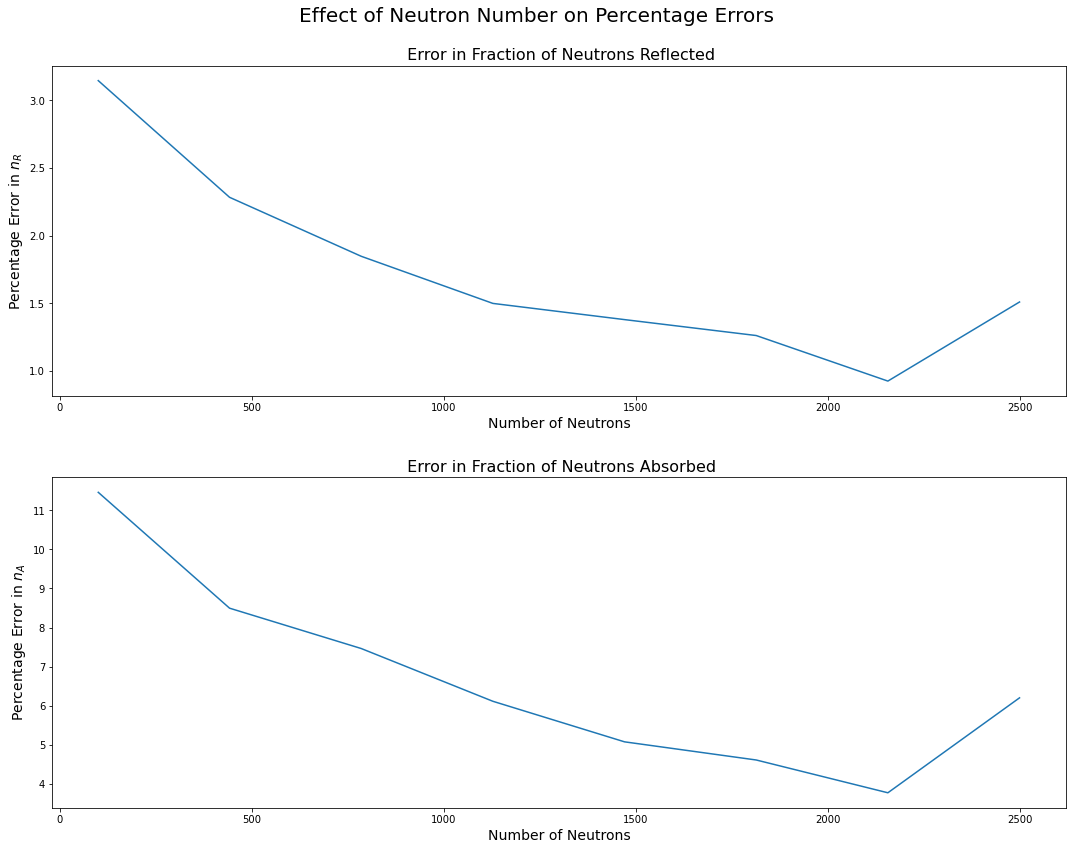

In [27]:
%matplotlib inline

NUM_TRIALS = 8
NUM_NEUTRON_ARRAY = np.linspace(100, 2500, num=8, dtype=int)

def mean_and_std_calculator(array):
    """
    Calculates the mean and standard deviation of an array and packages them together with np.hstack
    
    Arguments:
        array (np array of floats)
    Returns
        mean_and_std (np array of floats)
    """
    
    mean = np.mean(array)
    std = np.std(array)
    mean_and_std = np.hstack([mean, std])
    
    return mean_and_std

def mean_neutron_loop_results(material_parameters, thickness, num_neutrons, num_trials):
    """
    Runs the neutron simulation for 'num_neutrons'-many neutrons 'num_trials'-many times. The simulation is run in a 
    material with parameters determined by 'thickness' and 'material parameters'. Finds the mean and standard deviation of
    the resulting n_T, n_R, and n_A values.
    
    Arguments:
        material_parameters (np array of floats)
        thickness (float)
        num_neutrons (int)
        num_trials (int)
    Returns:
        transmitted_final_values (np array of floats)
        reflected_final_values (np array of floats)
        absorbed_final_values (np array of floats)
    """
    
    #setting up ways to record n_R, n_R, n_A values
    fraction_transmitted_values = np.zeros(num_trials)
    fraction_reflected_values = np.zeros(num_trials)
    fraction_absorbed_values = np.zeros(num_trials)
    
    #for each trial:
    for i in range(num_trials):
        
        #run the loop for 'num_neutrons'-many neutrons
        results = neutron_loop(material_parameters, thickness, num_neutrons)
        #record n_T, n_R, n_A
        fraction_transmitted_values[i] = results[0]
        fraction_reflected_values[i] = results[1]
        fraction_absorbed_values[i] = results[2]
    
    #calculate the mean values of n_T, n_R, n_A, and thier associated errors
    transmitted_final_values = mean_and_std_calculator(fraction_transmitted_values)
    reflected_final_values = mean_and_std_calculator(fraction_reflected_values)
    absorbed_final_values = mean_and_std_calculator(fraction_absorbed_values)
    
    return transmitted_final_values, reflected_final_values, absorbed_final_values

def percentage_error(num_neutron_array, material_parameters, thickness, num_trials):
    """
    Calls the 'mean_neutron_loop_results' function for each value in the array 'num_neutron_array', these values being  
    different numbers of neutrons to run the simulation with. For each value, the simulation is run according to the 
    parameters 'material_parameters'and 'thickness' and is repeated 'num_trials'-many times. Calculates the percentage
    error in n_R, and n_A for each number of neutrons and outputs each set of values as its own array.
    
    Arguments:
        num_neutron_array (np array of ints)
        material_parameters (np array of floats)
        thickness (float)
        num_trials (int)
    Returns:
        percent_reflected_error (np array of floats)
        percent_absorbed_error (np array of floats)
    """
    
    #set up way to record percent errors in n_R and n_A
    percent_reflected_error = np.zeros(len(num_neutron_array))
    percent_absorbed_error = np.zeros(len(num_neutron_array))

    for i in range(len(num_neutron_array)):
        
        #run the mean neutron loop for each value of neutron number
        results = mean_neutron_loop_results(material_parameters, thickness, num_neutron_array[i], num_trials)
        #calculate the percentage errors in n_R and n_A
        percent_reflected_error[i] = (results[1][1] * 100) / results[1][0]
        percent_absorbed_error[i] = (results[2][1] * 100) / results[2][0]
        
    return percent_reflected_error, percent_absorbed_error

percent_error = percentage_error(NUM_NEUTRON_ARRAY, water_parameters, THICKNESS, NUM_TRIALS)

#set up the figure
plt.rcParams["figure.figsize"] = (15, 12)
error_figure = plt.figure()
error_figure.suptitle(r'Effect of Neutron Number on Percentage Errors', fontsize=20)

#setting up the n_R error plot
reflected_error_plot = error_figure.add_subplot(211)
reflected_error_plot.set_title('\n Error in Fraction of Neutrons Reflected', fontsize=16)
reflected_error_plot.set_xlabel('Number of Neutrons', fontsize=14)
reflected_error_plot.set_ylabel(r'Percentage Error in $n_R$', fontsize=14)

#plotting the n_R percentage error values
reflected_error_curve = reflected_error_plot.plot(NUM_NEUTRON_ARRAY, percent_error[0])

#setting up the n_A subplot
absorbed_error_plot = error_figure.add_subplot(212)
absorbed_error_plot.set_title('\n Error in Fraction of Neutrons Absorbed', fontsize=16)
absorbed_error_plot.set_xlabel('Number of Neutrons', fontsize=14)
absorbed_error_plot.set_ylabel(r'Percentage Error in $n_A$', fontsize=14)

#plotting the n_A percentage error values
absorbed_error_curve = absorbed_error_plot.plot(NUM_NEUTRON_ARRAY, percent_error[1])

plt.tight_layout()

As can be seen from the plots, the percentage error on both of these values decreases with increased neutron number, subject to some statistical varition. Note however, that this statistical variation can be decreased with increased number of trials. Therefore, we should, as expected, use as many trials, and neutrons per trial, as possible. The main piece of new information that can be gleaned from these plots is that the dependence appears to be exponential, and so using as few as 2000 neutrons will give reasonable errors (of the order of a few percent), provided that a sufficient number of repeated trials are undertaken.

### Determination of $n_T, n_R,$ and $n_A$ :

Now, we can finally find $n_T$, $n_R$, and $n_A$ for each of the three materials considered: water, lead, and graphite. For each material, this is done for the case of 5000 neutrons, repeated for 5 trials (here, as well as in the next section, the number of trials is reduced for the sake of computation time).

In [14]:
NUM_NEUTRONS= 5000
NUM_TRIALS = 5
THICKNESS = 20

results_water = mean_neutron_loop_results(water_parameters, THICKNESS, NUM_NEUTRONS, NUM_TRIALS)
results_lead = mean_neutron_loop_results(lead_parameters, THICKNESS, NUM_NEUTRONS, NUM_TRIALS)
results_graphite = mean_neutron_loop_results(graphite_parameters, THICKNESS, NUM_NEUTRONS, NUM_TRIALS)

print('\n Water Results: n_T = {:3.3f} ± {:3.3f}, n_R = {:3.3f} ± {:3.3f}, n_A = {:3.3f} ± {:3.3f}'.format(results_water[0][0], 
                                                                                                           results_water[0][1], 
                                                                                                           results_water[1][0], 
                                                                                                           results_water[1][1], 
                                                                                                           results_water[2][0], 
                                                                                                           results_water[2][1]))

print('\n Lead Results: n_T = {:3.3f} ± {:3.3f}, n_R = {:3.3f} ± {:3.3f}, n_A = {:3.3f} ± {:3.3f}'.format(results_lead[0][0], 
                                                                                                          results_lead[0][1], 
                                                                                                          results_lead[1][0], 
                                                                                                          results_lead[1][1], 
                                                                                                          results_lead[2][0], 
                                                                                                          results_lead[2][1]))

print('\n Graphite Results: n_T = {:3.3f} ± {:3.3f}, n_R = {:3.3f} ± {:3.3f}, n_A = {:3.3f} ± {:3.3f}'.format(results_graphite[0][0],
                                                                                                              results_graphite[0][1],
                                                                                                              results_graphite[1][0], 
                                                                                                              results_graphite[1][1], 
                                                                                                              results_graphite[2][0], 
                                                                                                              results_graphite[2][1]))


 Water Results: n_T = 0.000 ± 0.000, n_R = 0.798 ± 0.004, n_A = 0.202 ± 0.004

 Lead Results: n_T = 0.122 ± 0.002, n_R = 0.694 ± 0.004, n_A = 0.184 ± 0.005

 Graphite Results: n_T = 0.175 ± 0.002, n_R = 0.807 ± 0.003, n_A = 0.018 ± 0.001


Looking at these values, one can immediately notice that water transmits by far the fewest neutrons. Hence,  water is the best neutron shield of all materials considered. Lead is the second best, and graphite is the worst. Water's superiority is perhaps obvious given its significantly smaller total mean free path. The ordering of lead and graphite however could initially be surprising, given that lead has a marginally larger mean free path than graphite. Looking at $n_A$ values however, it can be seen that this defecit is more than made up for by the significantly larger number of neutrons that lead is able to absorb. Note that this is all of course subject to a number of assumptions, namely our considering only thermal neutrons, considering only the processes of scattering and absorption by atoms, and assuming that all scattering is isotropic. 

### Determination of Characteristic Attenuation Length

Now, let's use our simulation to calculate the characteristic attenuation lengths, $\lambda$, of the three materials. To do so we will undertake a procedure very similar to when we calculated the characteristic attenuation length of water considering only absorption. For a given trial of a given material, the following procedure is undertaken:

For each thickness value $T$, we run the simulation and calculate the number of neutrons transmitted, $N_T$, and then take the logarithm. This allows us to fit a linear relationhip of the form

$$\ln(N_T) = \frac{-T}{\lambda} $$

to the results, from which $\lambda$ can be determined. 

For each of these trials we will use 10 $T$ values ranging from 1 to 10 cm. For each of these calculations, our simulation will be run with 3000 neutrons. This procedure is then repeated for four total trials and the average $\lambda$ for the given material, $\lambda_m$, can be calculated as a weighted mean.

Mean Characteristic Attenuation Length Values:
  Water: 1.865 ± 0.027 cm
  Lead: 8.233 ± 0.123 cm
  Graphite 9.153 ± 0.222 cm


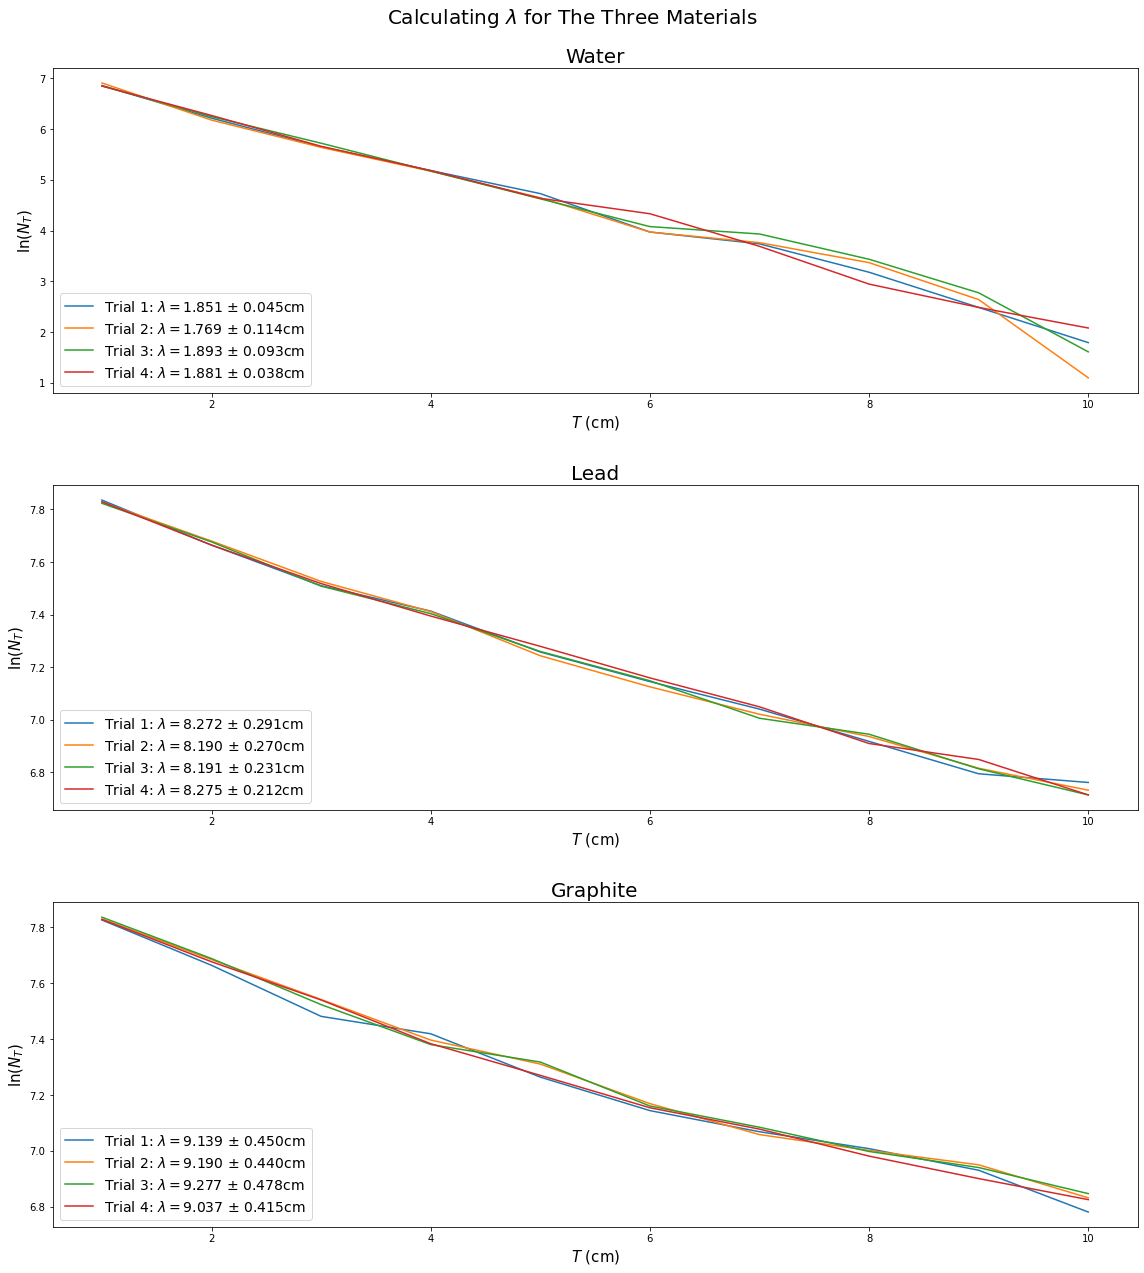

In [15]:
%matplotlib inline

NUM_NEUTRONS = 3000
NUM_TRIALS = 4
THICKNESS_ARRAY = np.linspace(1, 10, num=10, dtype=int)

def attenuation_log_calculator(material_parameters, thickness_values, num_neutrons):
    """
    Runs the simulation for one trial for each value of T in 'thickness_values'. Each trial uses 'num_neutrons'-many neutrons 
    and the material is determined by 'material parameters'. As such, calculates ln(N_T) for each T value. Also removes 
    datapoints with N_T=0 to avoid ln(N_T) blowing up to minus infinity.
    
    Arguments:
        material_parameters (np array of floats)
        thickness_values (np array of floats)
        num_nuetrons (int)
    Returns:
        thickness_values_nonzero (np array of floats)
        ln_N_T_values (np array of floats)
    """
    
    #setting up way to record the N_T values calculated for this material at this length
    N_T_values = np.zeros(len(thickness_values))
    
    #unpacking n_t and multiplying by num_neutrons to give N_T
    for i in range(len(thickness_values)):
        
        n_T = mean_neutron_loop_results(material_parameters, thickness_values[i], num_neutrons, 1)[0][0] 
        N_T_values[i] = n_T * num_neutrons
    
    #removing any datapoints for which N=0 to avoid an error with the logarithm:
    thickness_values_nonzero = np.empty(0)
    N_T_values_nonzero = np.empty(0)
    
    for i in range(len(N_T_values)):
        if N_T_values[i] == 0:    
            None
        else:
            thickness_values_nonzero = np.append(thickness_values_nonzero, thickness_values[i])
            N_T_values_nonzero = np.append(N_T_values_nonzero, N_T_values[i])
    
    #taking the natural log of the N_T values
    ln_N_T_values = np.log(N_T_values_nonzero)
    
    return thickness_values_nonzero, ln_N_T_values

def attenuation_plotter(axes, material_parameters, thickness_values, num_neutrons, num_trials):
    """
    Runs attenuation_log_calculator() for 'num_trials'-many trials, and then uses its outputs to calculate the attenuation
    lengths for each trial. Plots a graph of each trial along with its attenuation length on 'axes' and calculates the weighted
    mean of the attenuation length values and the associated error.
    
    Arguments:
        axes (matplotlib axes)
        material_parameters (np array of floats)
        thickness_values (np array of floats)
        num_neutrons (int)
        num_trials (int)
    Returns:
        weighted_mean (float)
        weighted_mean_error (float)
    """
    #setting up a way to record attenuation length values and thier errors
    attenuation_length_values = np.zeros(num_trials)
    attenuation_length_errors = np.zeros(num_trials)
    
    #for each trial:
    for i in range(num_trials):
        
        #determine T and ln_N_T
        log_results = attenuation_log_calculator(material_parameters, thickness_values, num_neutrons)
        T_values = log_results[0]
        ln_N_T_values = log_results[1]
        
        #make the linear fit to determine the attenuation length and associated error and record it
        fit_results = linear_fit_params(T_values, ln_N_T_values)   
        attenuation_length_values[i] = fit_results[2]
        attenuation_length_errors[i] = fit_results[3]
        
        #plotting the results of the simulation
        axes.plot(T_values, ln_N_T_values, 
                  label=r'Trial {}: $\lambda=${:3.3f} ± {:3.3f}cm'.format(i + 1, attenuation_length_values[i],
                                                                          attenuation_length_errors[i]))
    axes.legend(loc='lower left', fontsize=14)
                  
    #calculating weighted mean of the attenuation length for a given trial 
    weight = np.power(attenuation_length_errors, -2)
    weighted_mean = np.average(attenuation_length_values, weights=weight)
    weighted_mean_error = np.power(np.sum(weight), -0.5)
                  
    return weighted_mean, weighted_mean_error

#Setting up the figure:
plt.rcParams["figure.figsize"] = (16, 18)
attenuation_figure = plt.figure()
attenuation_figure.suptitle(r'Calculating $\lambda$ for The Three Materials', fontsize=20)

#setting up the water subplot:
water_plot = attenuation_figure.add_subplot(311)
water_plot.set_title('\nWater', fontsize=20)
water_plot.set_xlabel('$T$ (cm)', fontsize=15)
water_plot.set_ylabel(r'$\ln(N_T)$', fontsize=15)

#making the water plots
water_lambda = attenuation_plotter(water_plot, water_parameters, THICKNESS_ARRAY, NUM_NEUTRONS, NUM_TRIALS)  

#setting up the lead subplot:
lead_plot = attenuation_figure.add_subplot(312)
lead_plot.set_title('\nLead', fontsize=20)
lead_plot.set_xlabel('$T$ (cm)', fontsize=15)
lead_plot.set_ylabel(r'$\ln(N_T)$', fontsize=15)

#making the lead plots
lead_lambda = attenuation_plotter(lead_plot, lead_parameters, THICKNESS_ARRAY, NUM_NEUTRONS, NUM_TRIALS)  

#setting up the graphite subplot:
graphite_plot = attenuation_figure.add_subplot(313)
graphite_plot.set_title('\nGraphite', fontsize=20)
graphite_plot.set_xlabel('$T$ (cm)', fontsize=15)
graphite_plot.set_ylabel(r'$\ln(N_T)$', fontsize=15)

#making the graphite plots
graphite_lambda = attenuation_plotter(graphite_plot, graphite_parameters, THICKNESS_ARRAY, NUM_NEUTRONS, NUM_TRIALS)  

plt.tight_layout()

print('Mean Characteristic Attenuation Length Values:')
print('  Water: {:3.3f} ± {:3.3f} cm\n  Lead: {:3.3f} ± {:3.3f} cm\n  Graphite {:3.3f} ± {:3.3f} cm'.format(water_lambda[0],
                                                                                                             water_lambda[1], 
                                                                                                             lead_lambda[0], 
                                                                                                             lead_lambda[1], 
                                                                                                             graphite_lambda[0],
                                                                                                             graphite_lambda[1]))